In [1]:
from pycel import ExcelCompiler
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt

# Violin Plot

## Read and Normalize data

In [2]:
wb = ExcelCompiler(filename='ml_perf_data.xlsx')

In [3]:
def norm(x = 'Sheet1!D9:D48'):
    data = list(wb.evaluate(x))
    data = [i for i in data if i != ' '] 
    data = [float(x) for x in data if x is not None]
    print(data)

    if(len(data)!=0):
        data = [float(i)/min(data) for i in data]
        print(data)
        return data

In [4]:
image_mol_1 = norm('Sheet1!D7:D48')
image_mol_2 = norm('Sheet1!E7:E48')
image_mol_3 = norm('Sheet1!F7:F48')
image_mol_4 = norm('Sheet1!G7:G48')
image_res50_1 = norm('Sheet1!H7:H48')
image_res50_2 = norm('Sheet1!I7:I48')
image_res50_3 = norm('Sheet1!J7:J48')
image_res50_4 = norm('Sheet1!K7:K48')

coco_mol_1 = norm('Sheet1!L7:L48')
coco_mol_2 = norm('Sheet1!M7:M48')
coco_mol_3 = norm('Sheet1!N7:N48')
coco_mol_4 = norm('Sheet1!O7:O48')
coco_res34_1 = norm('Sheet1!P7:P48')
coco_res34_2 = norm('Sheet1!Q7:Q48')
coco_res34_3 = norm('Sheet1!R7:R48')
coco_res34_4 = norm('Sheet1!S7:S48')

nmt_1 = norm('Sheet1!T7:T48')
nmt_2 = norm('Sheet1!U7:U48')
nmt_3 = norm('Sheet1!V7:V48')
nmt_4 = norm('Sheet1!W7:W48')


[0.326928, 121.0, 80.0, 106.0, 121.0, 143.0, 51.0, 300.0, 112.0, 74.0, 394.0, 104.0, 3.219787, 7.17, 0.874068, 0.493552, 3.55, 0.584509, 3.1, 0.52]
[1.0, 370.112073606421, 244.7021974257329, 324.2304115890961, 370.112073606421, 437.4051778984975, 155.9976508589047, 917.6332403464983, 342.58307639602606, 226.34953261880293, 1205.1583223217344, 318.11285665345275, 9.848611926785104, 21.931434444281308, 2.6735795037439436, 1.5096657367983164, 10.858660010766897, 1.787882958938971, 9.48221015024715, 1.5905642832672637]
[6320.0, 8704.0, 302.0, 530.0]
[20.927152317880793, 28.821192052980134, 1.0, 1.7549668874172186]
[67124.18, 27244.81, 135073.0, 199098.3, 21929.0]
[3.060977700761548, 1.2424100506179032, 6.15956039947102, 9.079223858817091, 1.0]
[17473.6, 6041.69, 71011.4, 2359.96, 652.81, 29203.3, 507.71, 141807.0, 222388.0, 6520.75, 24866.0]
[34.41649760690158, 11.899883791928463, 139.8660652734829, 4.648244076342794, 1.285793070847531, 57.51964704260306, 1.0, 279.3070847531071, 438.021705

## Put data in dataframe and plot violin 

In [13]:
df = pd.DataFrame(columns=['name','data'])
df['data'] = image_mol_1
df['name'] = 'MobileNets-v1 (SS)'

def cancat(df,data=image_mol_2, name='image_mol_2'):
    df2 = pd.DataFrame(columns=['name','data'])
    df2['data'] = data
    df2['name'] = name
    df = pd.concat([df, df2],axis=0)
    return df

df = cancat(df,image_mol_2, 'MobileNets-v1 (MS)' )
df = cancat(df,image_mol_3, 'MobileNets-v1 (S)' )
df = cancat(df,image_mol_4, 'MobileNets-v1 (O)' )

df = cancat(df,image_res50_1, 'ResNet50-v1.5 (SS)' )
df = cancat(df,image_res50_2, 'ResNet50-v1.5 (MS)' )
df = cancat(df,image_res50_3, 'ResNet50-v1.5 (S)' )
df = cancat(df,image_res50_4, 'ResNet50-v1.5 (O)' )

df = cancat(df,coco_mol_1, 'SSD-MobileNets-v1 (SS)' )
df = cancat(df,coco_mol_2, 'SSD-MobileNets-v1 (MS)' )
df = cancat(df,coco_mol_3, 'SSD-MobileNets-v1 (S)' )
df = cancat(df,coco_mol_4, 'SSD-MobileNets-v1 (O)' )

df = cancat(df,coco_res34_1, 'SSD-ResNet34 (SS)' )
df = cancat(df,coco_res34_2, 'SSD-ResNet34 (MS)' )
df = cancat(df,coco_res34_3, 'SSD-ResNet34 (S)' )
df = cancat(df,coco_res34_4, 'SSD-ResNet34 (O)' )

df = cancat(df,nmt_1, 'GNMT (SS)' )
df = cancat(df,nmt_2, 'GNMT (MS)' )
df = cancat(df,nmt_3, 'GNMT (S)' )
df = cancat(df,nmt_4, 'GNMT (O)' )


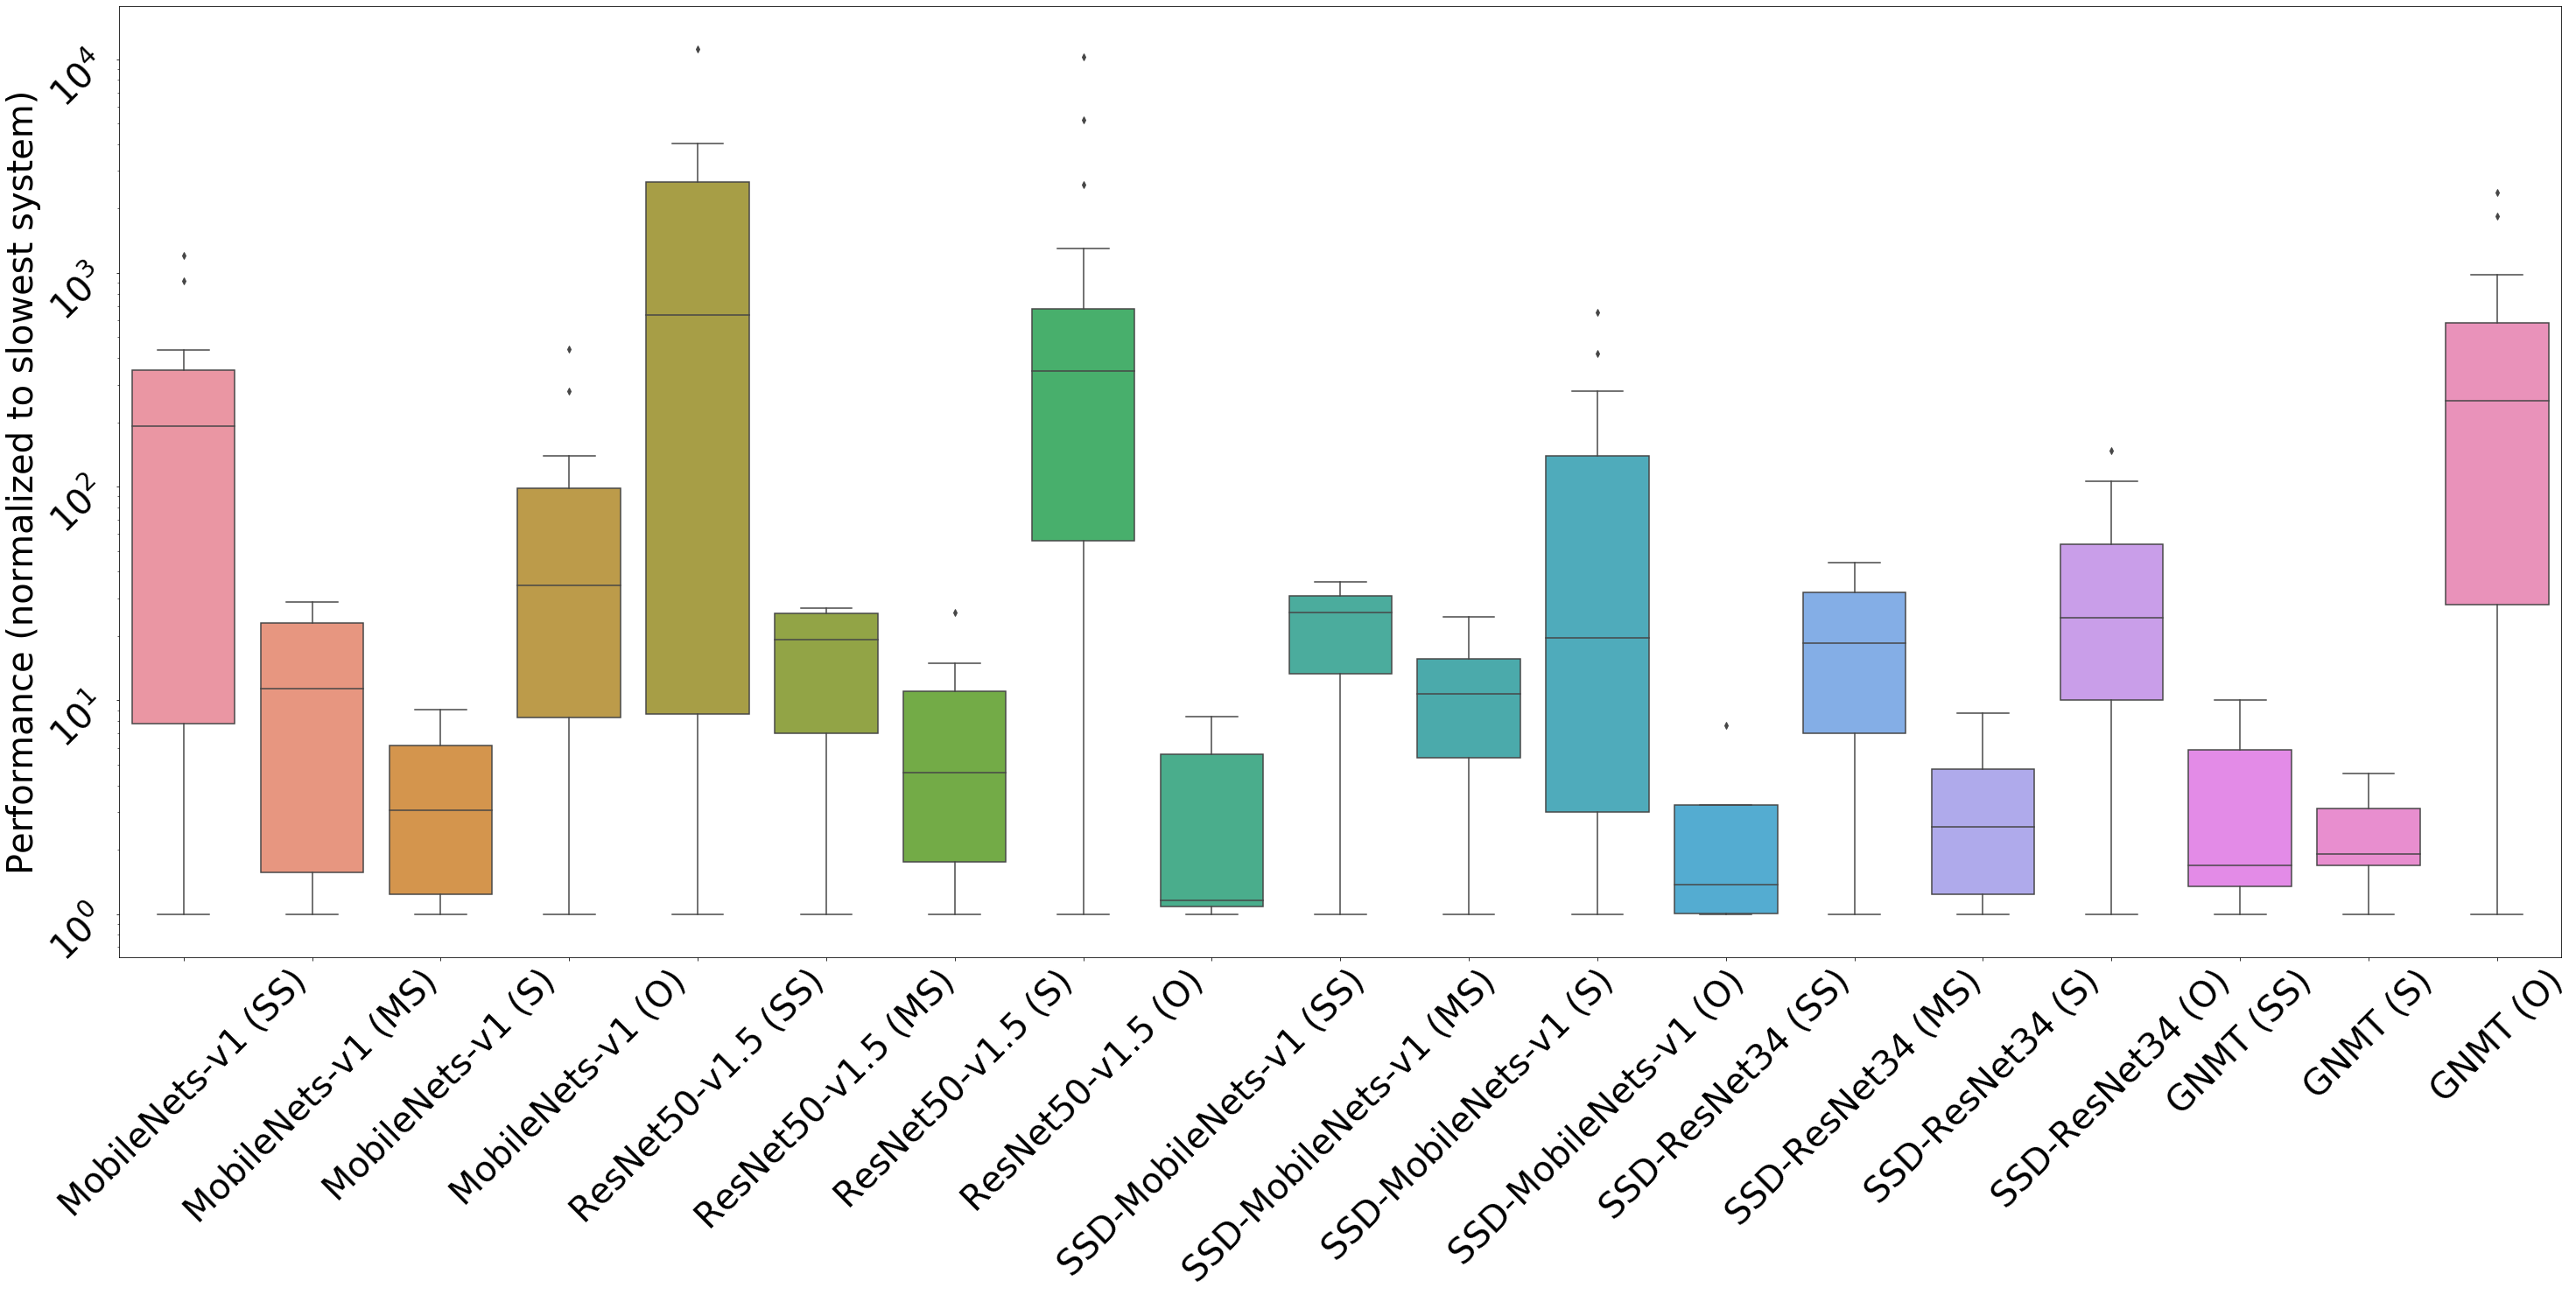

In [14]:
plt.figure(figsize=(50,20))
b = sns.boxplot(x="name",y="data",data=df)
b.axes.set_title("",fontsize=40)
b.set_xlabel("",fontsize=40)
b.set_ylabel("Performance (normalized to slowest system)",fontsize=40)
b.tick_params(labelsize=40, rotation=45)
plt.yscale('log')
plt.savefig("violin.pdf", bbox_inches='tight')
plt.show()